In [24]:
import numpy as np 
import  pandas as pd
import tensorflow as tf
import random
from keras.layers import Dense,Input, MaxPool2D , Conv2D , Flatten, Dropout
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy 
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Set random seeds
random.seed(44)
np.random.seed(44)
tf.random.set_seed(44)

## <font color='yellow'> Data Visualisation</font>

In [25]:
df = pd.read_csv('./train.csv')
print('traing data frame first values : ')
df.head()


traing data frame first values : 


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
print('training data frame shape: ',df.shape)
X_train = df.iloc[:,1:]
print("X_train.shape : ",X_train.shape)
print('first 5 rows of X_train: ')
X_train[:5]

training data frame shape:  (42000, 785)
X_train.shape :  (42000, 784)
first 5 rows of X_train: 


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y_train=df.loc[:,'label']
print("y_train.shape : ",y_train.shape,'\n\n')
print('first 5 rows of y_train: ')
y_train[:5]

y_train.shape :  (42000,) 


first 5 rows of y_train: 


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

### Showing some images from training set: 

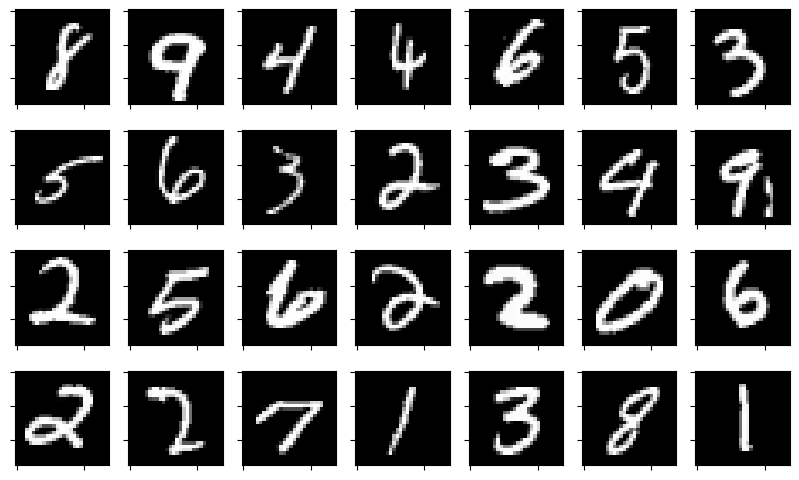

In [28]:
# Reshape for visualisation
image_shape = (28,28,1)
save_X_train=X_train
X_train= tf.reshape(tf.convert_to_tensor(X_train), (X_train.shape[0], image_shape[0], image_shape[1], image_shape[2]))


from matplotlib import pyplot as plt
from random import randint

nrows, ncols = 4, 7
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,6))
indexes = [randint(0, X_train.shape[0]) for i in range(nrows * ncols)]

i = 0
for _ in axes:
    for ax in _:
        ax.imshow(X_train[indexes[i]], cmap='gray')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        i += 1

X_train=save_X_train

## <font color='yellow'> Spliting Data and feature scaling</font>

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=44, shuffle=True)
print("X_train.shape : ",X_train.shape)
print("y_train.shape : ",y_train.shape,'\n\n')
print("X_test.shape : ",X_test.shape)
print("y_test.shape : ",y_test.shape)

# convert data into numpy array

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train.shape :  (33600, 784)
y_train.shape :  (33600,) 


X_test.shape :  (8400, 784)
y_test.shape :  (8400,)


### Feature Scalling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## <font color='yellow'>First : building model using a simple Neural network model with dense layers</font>

In [31]:
model =  Sequential([
    Input(shape=(X_train.shape[1])),
    Dense(units=X_train.shape[1],activation='relu',name='layer1'),
    Dense(units=64,activation='relu',name='layer2'),
    Dense(units=32,activation='relu',name='layer3'),
    Dense(units=32,activation='relu',name='layer4'),
    Dense(units=32,activation='relu',name='layer5'),
    Dense(units=16,activation='relu',name='layer6'),
    Dense(units=16,activation='relu',name='layer7'),
    Dense(units=16,activation='relu',name='layer8'),
    Dense(units=14,activation='relu',name='layer9'),
    Dense(units=10,activation='linear',name='output_layer'),
], name = 'simpleModel')



In [32]:

model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001)
)

#### Traing data 

In [33]:
model.fit(X_train_scaled,y_train, 
          epochs=10)


Epoch 1/10
1050/1050 [==============================] - 14s 11ms/step - loss: 0.5254
Epoch 2/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.1873
Epoch 3/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.1366
Epoch 4/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.1037
Epoch 5/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0874
Epoch 6/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0773
Epoch 7/10
1050/1050 [==============================] - 14s 14ms/step - loss: 0.0670
Epoch 8/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0602
Epoch 9/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0589
Epoch 10/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0411


Predictions :

In [34]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)



263/263 [==============================] - 3s 8ms/step


#### Convert predicted values into class labels

In [35]:
# Convert predicted values into class labels for the training set
y_train_labels = np.argmax(y_train_pred, axis=1)

# Convert predicted values into class labels for the test set
y_test_labels = np.argmax(y_test_pred, axis=1)

print(y_train_labels)
print(y_test_labels)



[5 1 1 ... 0 6 6]
[9 5 2 ... 7 7 6]


### Cumputing Accurancy

In [36]:

print('accuracy_score X_train : ',accuracy_score(y_true=y_train,y_pred=y_train_labels))
print('accuracy_score X_test : ',accuracy_score(y_true=y_test,y_pred=y_test_labels))

accuracy_score X_train :  0.9865773809523809
accuracy_score X_test :  0.9588095238095238


## <font color='yellow'>Second: Using Convlayers </font>


#### We have to reshape the data to 28 * 28 * 1 image

In [37]:
image_shape = (28,28,1)
train_n_images = X_train_scaled.shape[0]

X_train_scaled= tf.reshape(X_train_scaled, (train_n_images, image_shape[0], image_shape[1], image_shape[2]))

X_test=np.array(X_test)
test_n_images = X_test_scaled.shape[0]
X_test_scaled= tf.reshape(X_test_scaled, (test_n_images,image_shape[0], image_shape[1], image_shape[2]))

print(X_train_scaled.shape)
X_test_scaled.shape

(33600, 28, 28, 1)


TensorShape([8400, 28, 28, 1])

In [38]:
modelConv = Sequential(
    [
        Input(shape=image_shape),
        
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        
        Flatten(),
        Dropout(0.4),
        Dense(10, activation='linear',name='output_layer'),
    ], name = 'convModel'

)


### Train the conv model : 

In [39]:
modelConv.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=Adam(learning_rate=0.01))
print(X_train_scaled.shape)
print(X_train.shape)
print(y_train.shape)
modelConv.fit(X_train_scaled,y_train,epochs=10)


(33600, 28, 28, 1)
(33600, 784)
(33600,)
Epoch 1/10
1050/1050 [==============================] - 47s 43ms/step - loss: 0.2884
Epoch 2/10
1050/1050 [==============================] - 36s 35ms/step - loss: 0.1868
Epoch 3/10
1050/1050 [==============================] - 38s 36ms/step - loss: 0.1923
Epoch 4/10
1050/1050 [==============================] - 39s 37ms/step - loss: 0.1789
Epoch 5/10
1050/1050 [==============================] - 38s 36ms/step - loss: 0.1548
Epoch 6/10
1050/1050 [==============================] - 41s 39ms/step - loss: 0.1562
Epoch 7/10
1050/1050 [==============================] - 40s 38ms/step - loss: 0.1682
Epoch 8/10
1050/1050 [==============================] - 46s 44ms/step - loss: 0.1562
Epoch 9/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.1608
Epoch 10/10
1050/1050 [==============================] - 42s 40ms/step - loss: 0.1621


#### Predections 



In [40]:
y_train_pred = modelConv.predict(X_train_scaled)
y_test_pred = modelConv.predict(X_test_scaled)

# Convert predicted values into class labels for the training set
y_train_labels = np.argmax(y_train_pred, axis=1)

# Convert predicted values into class labels for the test set
y_test_labels = np.argmax(y_test_pred, axis=1)




263/263 [==============================] - 6s 20ms/step


#### Computing accurancy


In [41]:

print('accuracy_score X_train : ',accuracy_score(y_true=y_train,y_pred=y_train_labels))
print('accuracy_score X_test : ',accuracy_score(y_true=y_test,y_pred=y_test_labels))

accuracy_score X_train :  0.9825
accuracy_score X_test :  0.9760714285714286
